# Class3:神经网络八股

## Prerequisites

### Setup virtul environment

- `python3.6.9` + `TensorFlow2.3.0` + `sklearn` + `pandas` + `matplotlib`

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
import platform
platform.python_version()

'3.6.9'

## 3.1 搭建神经网络八股sequential

### 6步法搭建神经网络(也是提纲):
- 3.1.1 用TensorFlow API: tf.keras搭建网络八股
  - import
    - 所需模块
  - 3.1.2 指定train和test的特征以及标签(也可以将test数据集在第5步fit中指定)
  - 3.1.3 model = tf.keras.models.Sequential
    - Sequential([**一个封装从输入层到输出层网络结构的容器**])中执行
    - 搭建网络结构, 逐层网络进行描述，equal前向传播
  - 3.1.4 model.compile，配置神经网络的训练方法
    - compile()中执行
    - 所选optimizer优化器
    - 所选loss函数
    - 所选metrics评测指标, acc
  - 3.1.5 model.fit()
    - fit()中执行
    - train, test的输入特征和标签
    - 选定每次喂入神经网络的batch_size数目
    - 选定epochs数目
    - validation_split
    - validation_freq: 多少次epoch测试集验证一次准确率
  - 3.1.6 model.summary
    - summary()中执行
    - 打印网络结构和参数统计

### 6步法复现Iris分类,只需要20行代码

In [ ]:
# p8_iris_sequential.py

# step1, import
import tensorflow as tf
from sklearn import datasets
import numpy as np

# step2, 交代x_train, y_train
x_train = datasets.load_iris().data
y_train = datasets.load_iris().target
# 数据集乱序
np.random.seed(116)
np.random.shuffle(x_train)
np.random.seed(116)
np.random.shuffle(y_train)
tf.random.set_seed(116)

# step3, models.Sequential() 搭建神经网络
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2())   # 给定所选神经元个数为3, softmax激活函数, l2正则化
])

# step4, model.compile, 配置训练方法
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),    # 给定所选SGD优化器
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # 给定所选loss函数
              metrics=['sparse_categorical_accuracy'])    # 给定所选metrics

# step5, model.fit, 执行训练过程
model.fit(x_train, y_train, batch_size=32, epochs=500, validation_split=0.2, validation_freq=20)   # 给定batch_size, epochs, validation_split/freq

# step6, 打印结果
model.summary()

Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 2.3173 - sparse_categorical_accuracy: 0.3417
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 1.0797 - sparse_categorical_accuracy: 0.6167
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 0.8429 - sparse_categorical_accuracy: 0.6250
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7448 - sparse_categorical_accuracy: 0.6667
Epoch 5/500
4/4 [==============================] - 0s 1ms/step - loss: 0.9843 - sparse_categorical_accuracy: 0.6417
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7808 - sparse_categorical_accuracy: 0.6583
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5961 - sparse_categorical_accuracy: 0.7250
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5824 - sparse_categorical_accuracy: 0.7250
Epoch 9/500
4/4 [==============================] - 0s 1ms/step - loss: 0

## 3.2 搭建神经网络八股class

- 带有**跳连**的**非顺序**网络结构
  - class MyModel(Model) model=MyModel 进行封装
  - class MyModel(Model)
    - 括号中的Model**继承**了TensorFlow中的Model类
    - def __ init__(self):
        super(MyModel, self).__init__(),定义网络结构块
    - def __ call__(self,x):
        调用网络结构块，实现**前向传播**
        return y
  - model = MyModel()

In [ ]:
# p11_iris_class.py

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from sklearn import datasets
import numpy as np

x_train = datasets.load_iris().data
y_train = datasets.load_iris().target

np.random.seed(116)
np.random.shuffle(x_train)
np.random.seed(116)
np.random.shuffle(y_train)
tf.random.set_seed(116)

# class MyModel
class IrisModel(Model):
    def __init__(self):
        super(IrisModel, self).__init__()
        self.d1 = Dense(3, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2())

    def call(self, x):
        y = self.d1(x)
        return y

model = IrisModel()

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=500, validation_split=0.2, validation_freq=20)
model.summary()

Epoch 1/500
4/4 [==============================] - 0s 1ms/step - loss: 2.3173 - sparse_categorical_accuracy: 0.3417
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 1.0797 - sparse_categorical_accuracy: 0.6167
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 0.8429 - sparse_categorical_accuracy: 0.6250
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7448 - sparse_categorical_accuracy: 0.6667
Epoch 5/500
4/4 [==============================] - 0s 2ms/step - loss: 0.9843 - sparse_categorical_accuracy: 0.6417
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 0.7808 - sparse_categorical_accuracy: 0.6583
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5961 - sparse_categorical_accuracy: 0.7250
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5824 - sparse_categorical_accuracy: 0.7250
Epoch 9/500
4/4 [==============================] - 0s 1ms/step - loss: 0

## 3.3 MNIST数据集

- 像素点灰度值数据
- 由**7万**张(**28x28**) 像素点的0~9**手写数字图片**和**标签**构成, 其中
  - **6万**张作为训练集
  - **1万**张作为测试集
- 导入数据集
  - `mnist = tf.keras.datasets.mnist`
  - `(x_train, y_train) , (x_test, y_test) = mnist.load_data()`
- 将数据拉伸为一维数组(共计**28x28=784**个数值), 作为输入特征，输入神经网络

11493376/11490434 [==============================] - 0s 0us/step


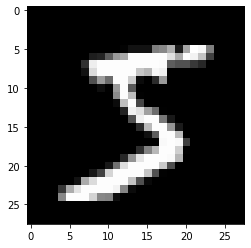

x_train[0]:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 2

In [ ]:
# p13_mnist_datasets.py

import tensorflow as tf
from matplotlib import pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 可视化训练集输入特征的第一个元素
plt.imshow(x_train[0], cmap='gray')  # 绘制灰度图
plt.show()

# 打印出训练集输入特征的第一个元素
print("x_train[0]:\n", x_train[0])
# 打印出训练集标签的第一个元素
print("y_train[0]:\n", y_train[0])

# 打印出整个训练集输入特征形状
print("x_train.shape:\n", x_train.shape)
# 打印出整个训练集标签的形状
print("y_train.shape:\n", y_train.shape)
# 打印出整个测试集输入特征的形状
print("x_test.shape:\n", x_test.shape)
# 打印出整个测试集标签的形状
print("y_test.shape:\n", y_test.shape)


In [ ]:
# p14_mnist_sequential.py

import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0   # 将输入特征(灰度值)归一化而变小,更适合神经网络吸收

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),    # 拉直为784个数值
    tf.keras.layers.Dense(128, activation='relu'),    #定义第一层神经网络为128个神经元， 选取relu激活函数
    tf.keras.layers.Dense(10, activation='softmax')   # 定义第二层由10个神经元(0-9的数字)，softmax函数让输出符合概率分布
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
model.summary()

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2641 - sparse_categorical_accuracy: 0.9244 - val_loss: 0.1480 - val_sparse_categorical_accuracy: 0.9544
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1186 - sparse_categorical_accuracy: 0.9653 - val_loss: 0.1050 - val_sparse_categorical_accuracy: 0.9658
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0835 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0818 - val_sparse_categorical_accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0625 - sparse_categorical_accuracy: 0.9807 - val_loss: 0.0802 - val_sparse_categorical_accuracy: 0.9756
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0477 - sparse_categorical_accuracy: 0.9853 - val_loss: 0.0966 - val_sparse_categorical_accuracy: 0.9707
Model: "sequential"
_________________________________________________________________
Layer (ty

In [ ]:
# p15_mnist_class.py
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


class MnistModel(Model):
    def __init__(self):
        super(MnistModel, self).__init__()
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        y = self.d2(x)
        return y


model = MnistModel()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
model.summary()

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2647 - sparse_categorical_accuracy: 0.9237 - val_loss: 0.1488 - val_sparse_categorical_accuracy: 0.9558
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1165 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.0982 - val_sparse_categorical_accuracy: 0.9704
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0802 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.0913 - val_sparse_categorical_accuracy: 0.9703
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0599 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.0820 - val_sparse_categorical_accuracy: 0.9738
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0474 - sparse_categorical_accuracy: 0.9852 - val_loss: 0.0813 - val_sparse_categorical_accuracy: 0.9757
Model: "mnist_model"
_________________________________________________________________
Layer (t

## 3.4 FASHION数据集
- 像素点灰度值数据
- 由**7万**张(**28x28**) 像素点的**衣裤图片**和**标签**构成, 其中
  - **6万**张作为训练集
  - **1万**张作为测试集
- 标签Label, 有**10**类:
  - **0** T-shirt/top
  - **1** Trouser
  - **2** Pullover
  - **3** Dress
  - **4** Coat
  - **5** Sandal
  - **6** Shirt
  - **7** Sneaker
  - **8** Bag
  - **9** Ankle boot
- 导入数据集
  - `fashion = tf.keras.datasets.fashion_mnist`
  - `(x_train, y_train) , (x_test, y_test) = fashion.load_data()`
- 将数据拉伸为一维数组(共计**28x28=784**个数值), 作为输入特征，输入神经网络

In [ ]:
# p16_fashion_sequential.py

import tensorflow as tf

fashion = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
model.summary()

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4974 - sparse_categorical_accuracy: 0.8246 - val_loss: 0.4115 - val_sparse_categorical_accuracy: 0.8521
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3731 - sparse_categorical_accuracy: 0.8655 - val_loss: 0.3883 - val_sparse_categorical_accuracy: 0.8622
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3352 - sparse_categorical_accuracy: 0.8777 - val_loss: 0.3597 - val_sparse_categorical_accuracy: 0.8721
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3114 - sparse_categorical_accuracy: 0.8855 - val_loss: 0.3771 - val_sparse_categorical_accuracy: 0.8671
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2932 - sparse_categorical_accuracy: 0.8920 - val_loss: 0.3706 - val_sparse_categorical_accuracy: 0.8721
Model: "sequential_1"
_________________________________________________________________
Layer (

In [ ]:
# p16_fashion_class.py

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model

fashion = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


class MnistModel(Model):
    def __init__(self):
        super(MnistModel, self).__init__()
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')

    def call(self, x):
        x = self.flatten(x)
        x = self.d1(x)
        y = self.d2(x)
        return y


model = MnistModel()

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1)
model.summary()

4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5000 - sparse_categorical_accuracy: 0.8239 - val_loss: 0.4476 - val_sparse_categorical_accuracy: 0.8412
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3741 - sparse_categorical_accuracy: 0.8651 - val_loss: 0.4075 - val_sparse_categorical_accuracy: 0.8530
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3382 - sparse_categorical_accuracy: 0.8770 - val_loss: 0.3567 - val_sparse_categorical_accuracy: 0.8721
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3123 - sparse_categorical_accuracy: 0.8854 - val_loss: 0.3460 - val_sparse_categorical_accuracy: 0.8751
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2951 - sparse_categorical_accuracy: 0.8916 - val_loss: 0.3380 - val_sparse_categorical_accuracy: 0.8806
Model: "mnist_model_1"
_________